# **Analyzing Marketing Campaigns with Pandas**

## Import pandas into the environment

In [1]:
import pandas as pd

## Import csv file of marketing data

In [2]:
marketing = pd.read_csv('/content/marketing.csv')

# **Examining the data**











In [3]:
print(marketing.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [4]:
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

In [5]:
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


In [6]:
print(marketing.shape)

(10037, 12)


# **Updating the data type of a column**




## Check the data type of is_retained

In [7]:
print(marketing['is_retained'].dtype)

object


## Convert is_retained to a boolean

In [8]:
marketing['is_retained'] = marketing['is_retained'].astype('bool')
print(marketing['is_retained'].dtype)

bool


# **Adding new columns**

## Map the channel to a channel code

In [9]:
channel_dict = {"House Ads": 1, "Instagram": 2,
                "Facebook": 3, "Email": 4, "Push": 5}
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)
print(marketing['channel_code'].head(3))

0    1.0
1    1.0
2    1.0
Name: channel_code, dtype: float64


In [10]:
import numpy as np     # Import numpy
marketing['is_correct_lang'] = np.where(marketing['language_preferred']
== marketing['language_displayed'],'Yes','No')
print(marketing['is_correct_lang'].head(3))

0    Yes
1    Yes
2    Yes
Name: is_correct_lang, dtype: object


# **Date columns**

## Import marketing.csv with date columns

In [11]:
import pandas as pd
marketing = pd.read_csv('/content/marketing.csv',parse_dates=['date_served','date_subscribed','date_canceled'], date_format='%y-%m-%d')


In [12]:
print(marketing['date_canceled'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
10032    1/24/18
10033        NaN
10034        NaN
10035        NaN
10036        NaN
Name: date_canceled, Length: 10037, dtype: object


# **Initial Exploratory Analysis**

## Daily marketing reach by channel

In [13]:
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()
print(daily_users.head())

date_served
1/1/18     362
1/10/18    337
1/11/18    310
1/12/18    301
1/13/18    306
Name: user_id, dtype: int64


## Visualizing daily marketing reach

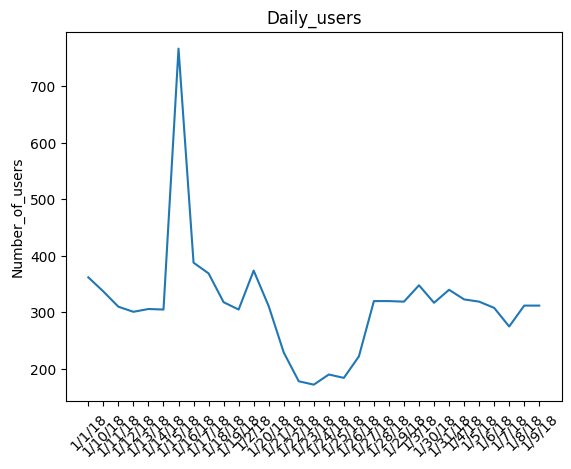

In [14]:
import matplotlib.pyplot as plt
plt.plot(daily_users)                    # Plot daily_users
plt.title('Daily_users')                 # Include a title and y-axis label
plt.ylabel('Number_of_users')
plt.xticks(rotation=45)                  # Rotate the x-axis labels by 45 degrees
plt.show()                               # Display the plot


# **Exploratory Analysis & Summary Statistics**

## Calculating conversion rate

In [15]:
total = marketing['user_id'].nunique()                                         # Calculate the number of people we marketed to
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()   # Calculate the number of people who subscribed
conversion_rate = subscribers / total                                          # Calculate the conversion rate
print(round(conversion_rate*100, 2), "%")


13.89 %


## Calculating retention rate

In [16]:
total_subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()       # Calculate the number of subscribers
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()              # Calculate the number of people who remained subscribed
retention_rate = retained / total_subscribers                                            # Calculate the retention rate
print(round(retention_rate*100, 2), "%")


66.8 %


## Comparing language conversion rate (I)

In [17]:
english_speakers = marketing[marketing['language_displayed'] == 'English']     # Isolate english speakers
total = english_speakers['user_id'].nunique()     # Calculate the total number of English speaking users
subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()   # Calculate the number of English speakers who converted
conversion_rate = subscribers/total             # Calculate conversion rate
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


## Comparing language conversion rate (II)

In [18]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] ==  True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers / total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


## Aggregating by date

In [19]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rates = subscribers/total
print(daily_conversion_rates)

date_served
1/1/18     0.099448
1/10/18    0.118694
1/11/18    0.080645
1/12/18    0.076412
1/13/18    0.084967
1/14/18    0.085246
1/15/18    0.113429
1/16/18    0.255155
1/17/18    0.219512
1/18/18    0.091195
1/19/18    0.059016
1/2/18     0.098930
1/20/18    0.067524
1/21/18    0.087336
1/22/18    0.123596
1/23/18    0.122093
1/24/18    0.115789
1/25/18    0.125000
1/26/18    0.090090
1/27/18    0.065625
1/28/18    0.062500
1/29/18    0.059561
1/3/18     0.103448
1/30/18    0.066246
1/31/18    0.052941
1/4/18     0.108359
1/5/18     0.125392
1/6/18     0.113636
1/7/18     0.141818
1/8/18     0.115385
1/9/18     0.125000
Name: user_id, dtype: float64


# **Plotting Campaign Results (I)**

*   ## Visualize conversion rate by language

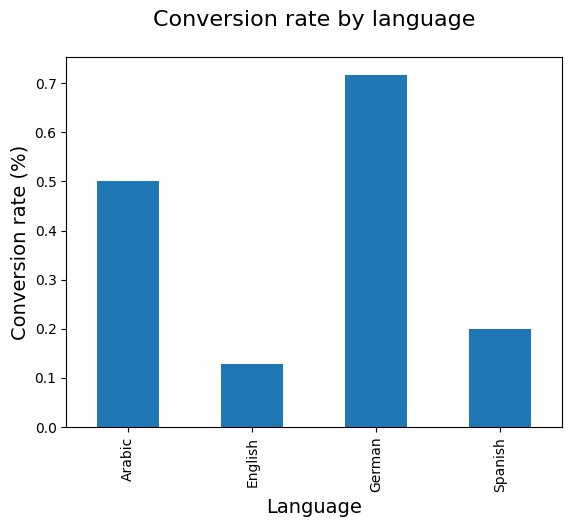

In [20]:
language_conversion_rate.plot(kind = 'bar')
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)
plt.show()

## Setting up our data to visualize daily conversion

In [21]:
daily_conversion_rate = pd.DataFrame(daily_conversion_rates.reset_index())
daily_conversion_rate.columns = ['date_served',
                              'conversion_rate']

## Visualize daily conversion rate

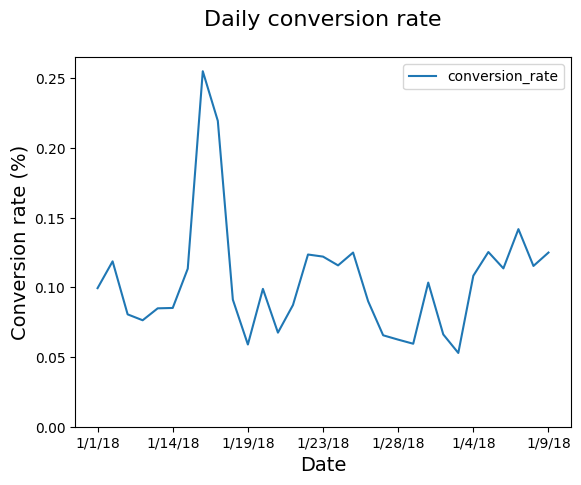

In [22]:
# Create a line chart using daily_conversion_rate
daily_conversion_rate.plot('date_served','conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

plt.ylim(0) # Set the y-axis to begin at 0
plt.show()

# Plotting Campaign Results

## Marketing channels across age groups

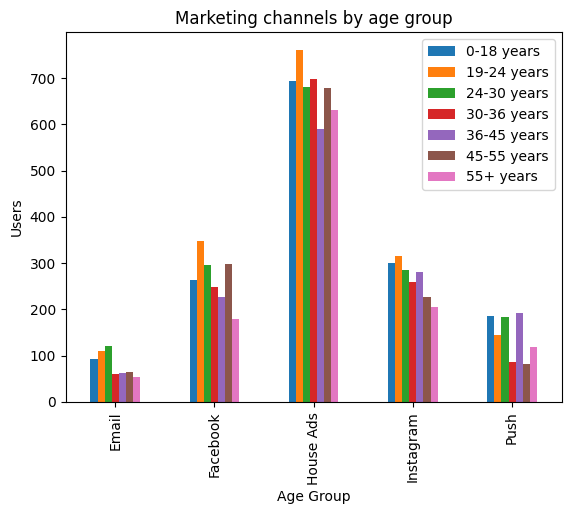

In [23]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')

# Add a legend to the plot
plt.legend(loc = 'upper right',
           labels = channel_age_df.columns.values)
plt.show()

## Grouping and counting by multiple columns

In [24]:
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])['user_id'].nunique()

print(retention_total.head())

date_subscribed  subscribing_channel
1/1/18           Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [25]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True]\
                           .groupby(['date_subscribed',
                                     'subscribing_channel'])\
                            ['user_id'].nunique()

print(retention_subs.head())

date_subscribed  subscribing_channel
1/1/18           Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


## Analyzing retention rates for the campaign

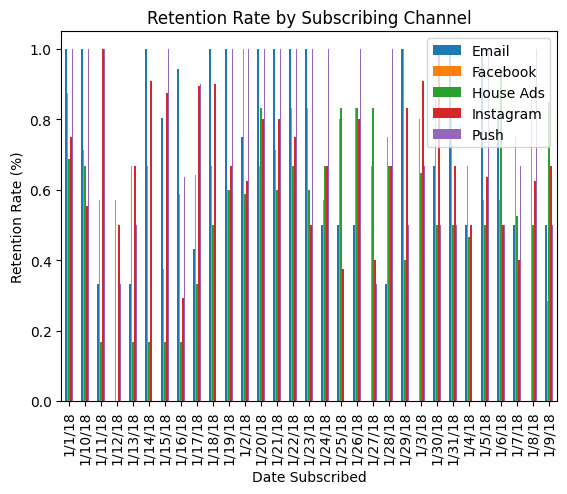

In [26]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot(kind = 'bar')

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', labels = retention_rate_df.columns.values)
plt.show()


# **Conversion Attribution**

## Building a conversion function to automate analysis

In [27]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names) ['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()

    # Conversion rate
    conversion_rate = column_conv/column_total

    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

## Test and visualize conversion function

date_served  age_group  
1/1/18       0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
1/9/18       24-30 years    0.152174
             30-36 years    0.090909
             36-45 years    0.093023
             45-55 years    0.068182
             55+ years      0.102564
Name: user_id, Length: 217, dtype: float64


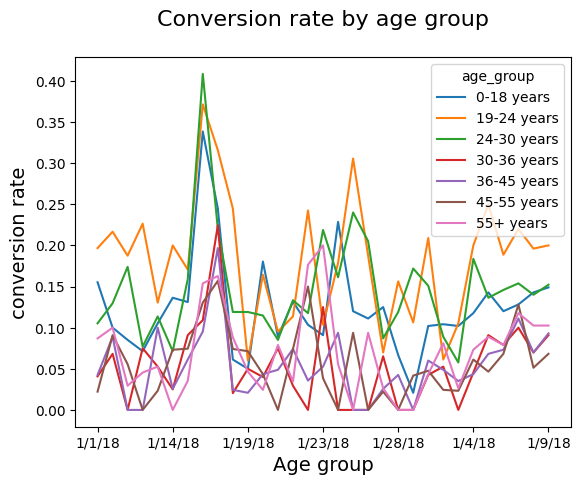

In [28]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

## Plotting function

In [29]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n',
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

## Plotting conversion rate by age group Using above created function

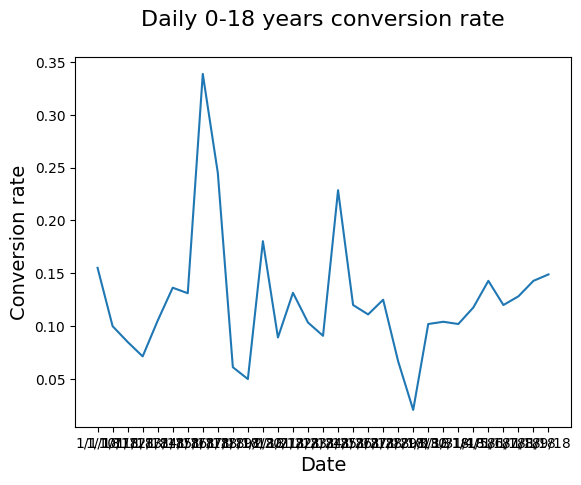

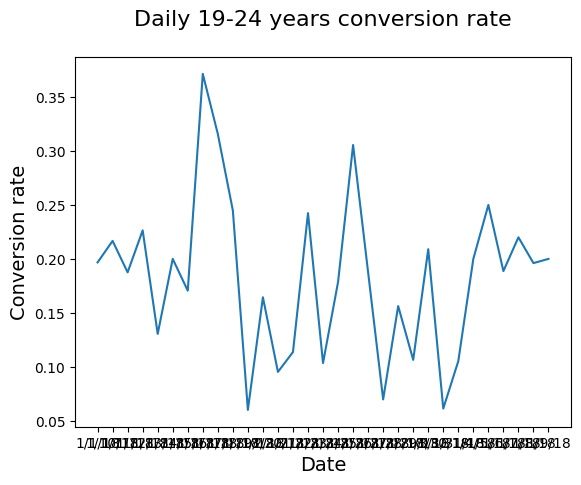

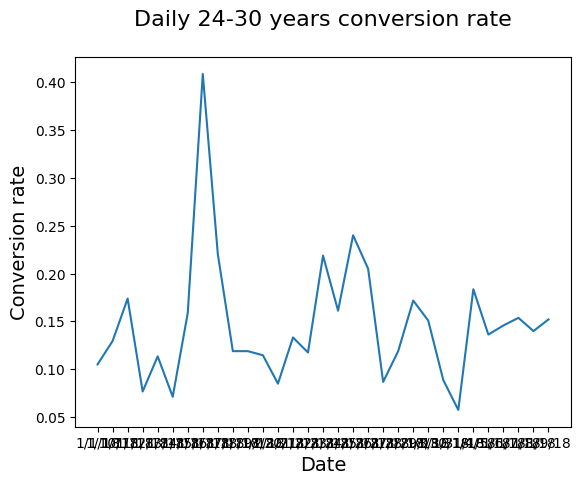

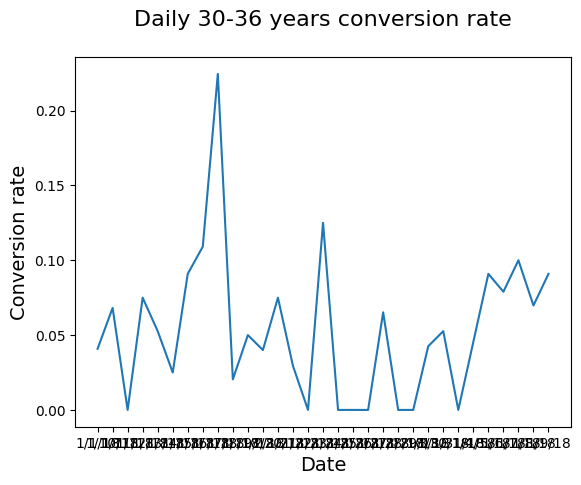

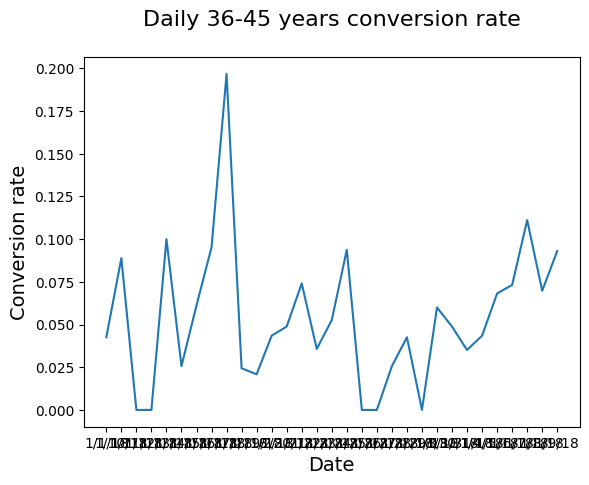

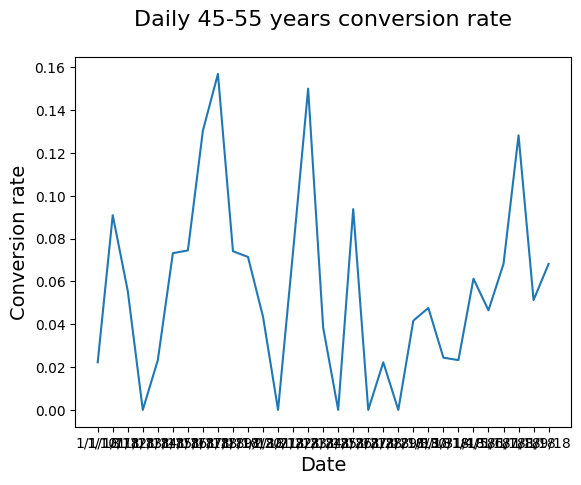

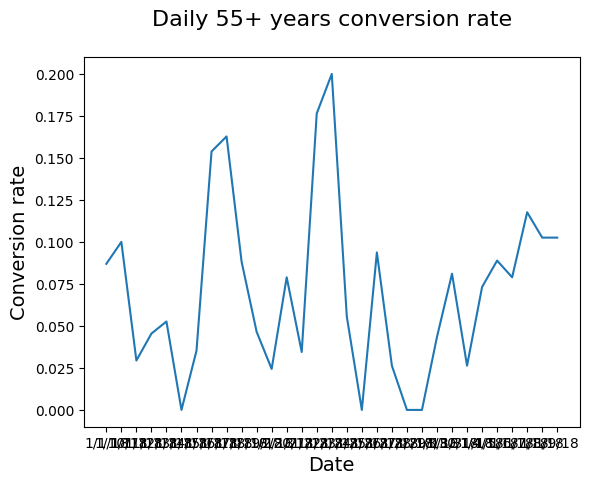

<Figure size 640x480 with 0 Axes>

In [30]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing,['date_served','age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

## House ads conversion rate

date_served  marketing_channel
1/1/18       Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


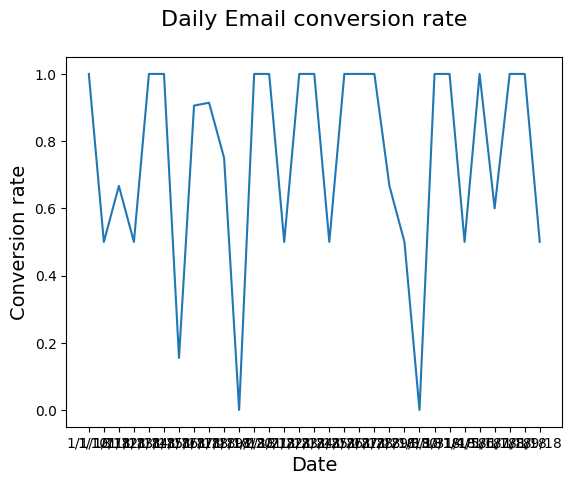

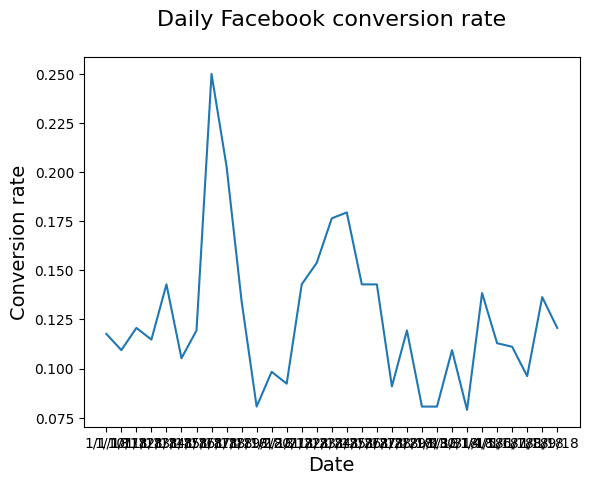

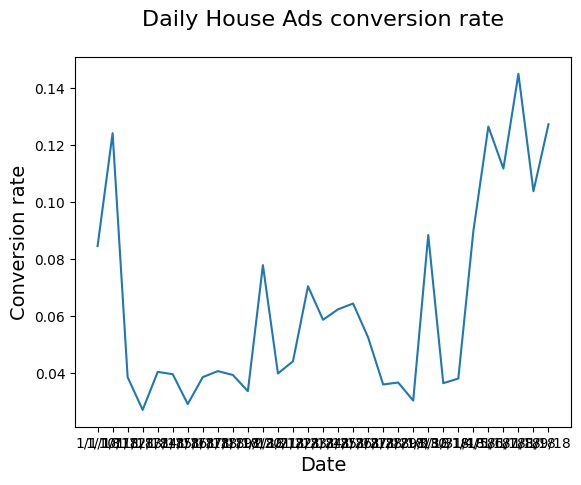

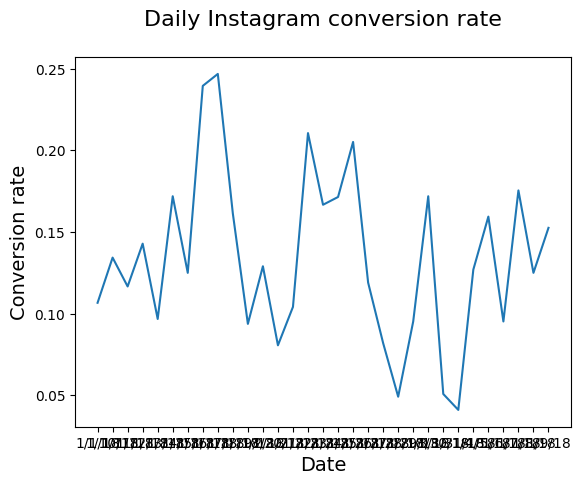

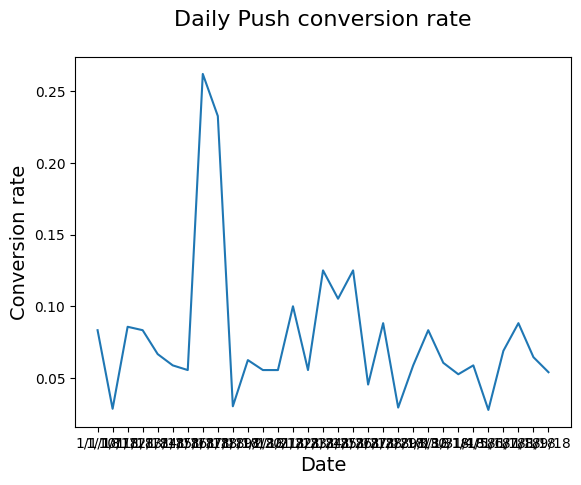

<Figure size 640x480 with 0 Axes>

In [31]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served','marketing_channel'])

print(daily_conv_channel.head())

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

## Analyzing House ads conversion rate

/tmp/ipython-input-32-3694269705.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing['date_served'] = pd.to_datetime(marketing['date_served'])


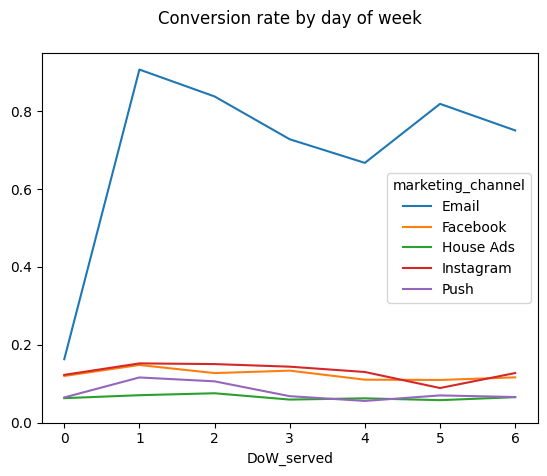

In [32]:
marketing['date_served'] = pd.to_datetime(marketing['date_served'])

# Add day of week column to marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing,
 ['DoW_served','marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

## House ads conversion by language

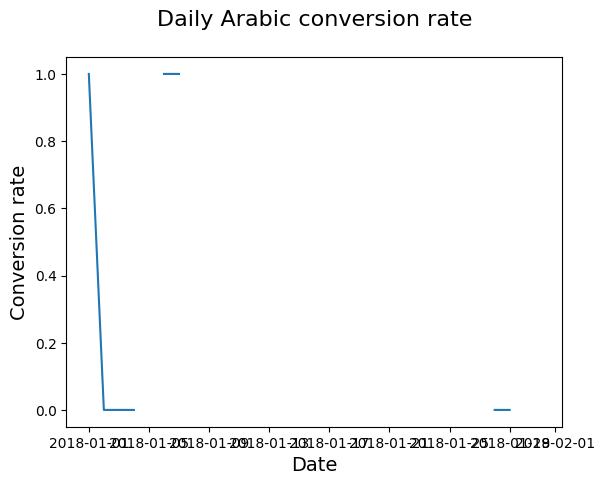

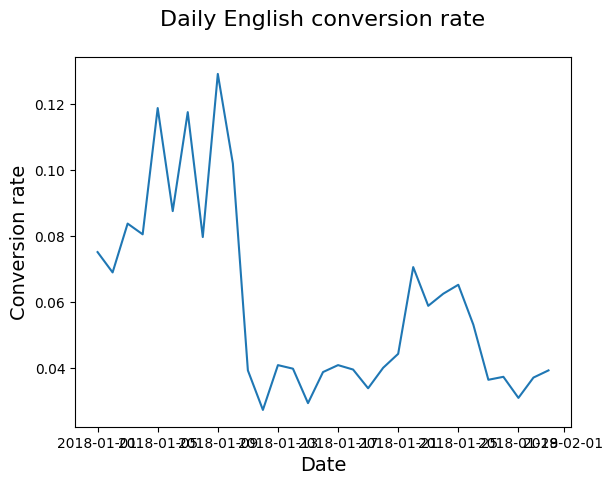

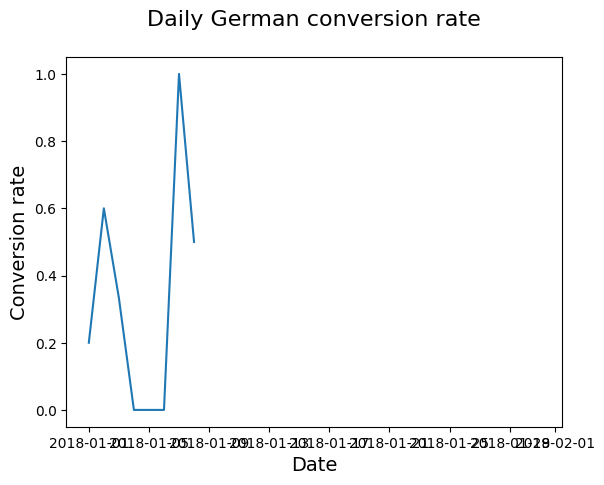

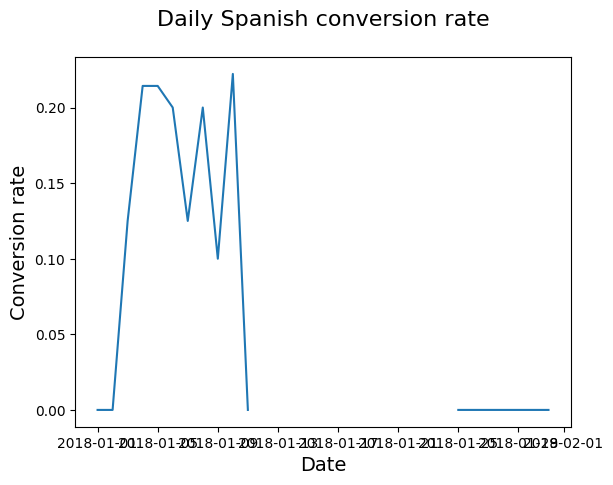

<Figure size 640x480 with 0 Axes>

In [33]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing['marketing_channel'] == 'House Ads']


# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads,['date_served','language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

## Creating a DataFrame for house ads

*   Checking reasons for sudden drop in conversion rate



In [34]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'],
    'Yes',
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['date_served'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


/tmp/ipython-input-34-3662236238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


## Confirming house ads error

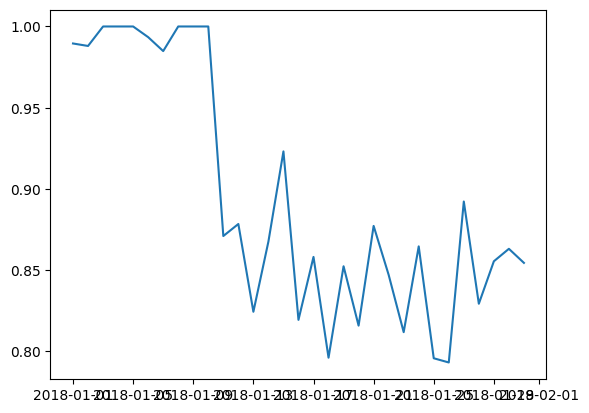

In [35]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] =  language_check_df['Yes'] / language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

# **Resolving Inconsistencies**

## Setting up conversion indexes

In [36]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug,'language_displayed')

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


## Analyzing user preferences

In [37]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served','language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

## Creating a DataFrame based on indexes

In [39]:
# Step 1: Convert 'date_served' to datetime
marketing['date_served'] = pd.to_datetime(marketing['date_served'])

# Step 2: Filter English data from Jan 11–31, 2018
english_df = marketing[
    (marketing['language_displayed'] == 'English') &
    (marketing['date_served'] >= '2018-01-11') &
    (marketing['date_served'] <= '2018-01-31')
]

# Step 3: Compute English conversion rate
english_conv_rate = (english_df['converted'] == 'True').sum() / len(english_df)

# Step 4: Define language multipliers (as an example, adjust as needed)
spanish_index = 0.95
arabic_index = 0.85
german_index = 1.05

# Step 5: Add conversion rate columns to the full dataset
marketing['english_conv_rate'] = english_conv_rate
marketing['expected_spanish_rate'] = english_conv_rate * spanish_index
marketing['expected_arabic_rate'] = english_conv_rate * arabic_index
marketing['expected_german_rate'] = english_conv_rate * german_index

# Step 6: Expected conversions for each user by language
marketing['expected_spanish_conv'] = marketing.apply(
    lambda row: row['expected_spanish_rate'] if row['language_displayed'] == 'Spanish' else 0,
    axis=1
)
marketing['expected_arabic_conv'] = marketing.apply(
    lambda row: row['expected_arabic_rate'] if row['language_displayed'] == 'Arabic' else 0,
    axis=1
)
marketing['expected_german_conv'] = marketing.apply(
    lambda row: row['expected_german_rate'] if row['language_displayed'] == 'German' else 0,
    axis=1
)

In [49]:
# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31']['lang_converted','English']/converted.loc['2018-01-11':'2018-01-31']['user_id','English']

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_index
converted['expected_german_rate'] = converted['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']/100*converted[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate']/100 *converted[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']/100 *converted[('user_id','German')]

KeyError: ('lang_converted', 'English')

## Assessing bug impact

In [47]:
print(marketing.columns)

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained', 'DoW_served', 'english_conv_rate',
       'expected_spanish_rate', 'expected_arabic_rate', 'expected_german_rate',
       'expected_spanish_conv', 'expected_arabic_conv',
       'expected_german_conv'],
      dtype='object')


In [45]:
# Sum expected subscribers for each language
expected_subs = marketing['expected_spanish_conv'].sum() + marketing['expected_arabic_conv'].sum() + marketing['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = marketing[marketing['language_displayed'] == 'Spanish']['converted'].sum() + marketing[marketing['language_displayed'] == 'Arabic']['converted'].sum() + marketing[marketing['language_displayed'] == 'German']['converted'].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

KeyError: ('converted', 'Spanish')

In [41]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

KeyError: 'expected_spanish_conv'

# **Personalization A/B Test**

## Test allocation

In [ ]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant
alloc = email.groupby('variant')['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind = 'bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

## Comparing conversion rates

In [ ]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id','variant'])['converted'].max()

subscribers_df = pd.DataFrame(subscribers.unstack(level=1))

# Drop missing values from the control column
control = subscribers_df['control'].dropna()
control = pd.to_numeric(control).astype(float)  # Converts invalid entries to NaN


# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()
personalization = pd.to_numeric(personalization).astype(float)
print('Control conversion rate:',np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

## Creating a lift function

In [ ]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)

    # Calculate the lift using a_mean and b_mean
    lift = (b_mean - a_mean) / a_mean

    return str(round(lift*100, 2)) + '%'

# Print lift() with control and personalization as inputs
print(lift(control, personalization))

## Evaluating statistical significance

In [ ]:
from scipy.stats import ttest_ind
import numpy as np
ttest_ind(control,personalization)

## Building an A/B test segmenting function

In [ ]:
def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)

      # Limit marketing to email and subsegment
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1))
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization))
      print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

## Using segmentation function

In [ ]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

# Use ab_segmentation on age group
ab_segmentation('age_group')